## Exploratory data analysis / Legitimate traffic

In [101]:
import pandas as pd



In [102]:
data = pd.read_csv('clustering_1.csv')
data.shape

(72177, 14)

In [103]:
data.dtypes

@timestamp             object
destination.ip         object
destination.port       object
destination.bytes      object
destination.packets    object
event.duration         object
network.bytes          object
network.packets        object
source.bytes           object
source.packets         object
source.port            object
source.ip              object
network.transport      object
network.type           object
dtype: object

In [104]:
data.head()

,@timestamp,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,"Jan 16, 2020 @ 15:31:00.251",172.31.91.217,22,"123,300",141,"1,140,356,367,865","133,212",285,"9,912",144,"34,179",193.146.78.93,tcp,ipv4
1,"Jan 16, 2020 @ 15:31:00.251",34.238.162.185,"9,200","547,054",578,"1,140,098,665,211","2,934,616","1,672","2,387,562","1,094","38,310",172.21.0.2,tcp,ipv4
2,"Jan 16, 2020 @ 15:31:00.251",34.238.162.185,"9,200","273,527",289,"1,140,098,633,856","1,467,308",836,"1,193,781",547,"38,310",172.31.91.217,tcp,ipv4
3,"Jan 16, 2020 @ 15:31:00.251",34.238.162.185,"9,200","19,073,884","5,734","1,140,094,145,161","108,722,289","17,228","89,648,405","11,494","40,992",172.31.91.217,tcp,ipv4
4,"Jan 16, 2020 @ 15:31:00.251",192.168.17.11,"35,220","9,414",96,"1,140,095,773,053","22,228",242,"12,814",146,"5,671",192.168.17.17,tcp,ipv4


In [105]:
# Eliminamos las variables de poco interes
data.drop(['@timestamp', 'destination.ip', 'source.ip', 'network.type', 'network.transport'], axis = 'columns', inplace=True)

PREPROCESAMIENTO

In [106]:
# Quitamos comas al dataframe para el clustering
name2 = data.columns.values.tolist()
len_col2=len(name2)

for i in range(len_col2):
    data[name2[i]].replace(',','',regex=True,inplace=True)
#Eliminamos las variables que tienen mas de un 50% de valores nan
len_col = data.shape[1]
len_row = data.shape[0]
name = data.columns.values.tolist()
for i in range(len_col):
    cc = data[name[i]].isnull().sum()
    condition = (cc/len_row)
    if (condition > 0.8):
        data.drop([name[i]], axis = 'columns', inplace = True)
    
#Eliminamos las filas con nan
data=data.dropna()

In [107]:
pd.isnull(data).sum() > 0

destination.port       False
destination.bytes      False
destination.packets    False
event.duration         False
network.bytes          False
network.packets        False
source.bytes           False
source.packets         False
source.port            False
dtype: bool

In [108]:
data = data.astype("int64")
data.describe()

,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port
count,71545.000000,7.154500e+04,71545.000000,7.154500e+04,7.154500e+04,71545.000000,7.154500e+04,71545.000000,71545.000000
mean,12996.675882,4.085790e+04,158.120749,8.122989e+10,1.359226e+05,317.555259,9.506468e+04,159.434510,41188.079614
std,12843.578856,4.682884e+05,756.639250,1.673936e+11,2.599005e+06,1605.990188,2.139235e+06,866.423177,15975.173012
min,22.000000,7.600000e+01,1.000000,2.858500e+04,1.560000e+02,2.000000,8.000000e+01,1.000000,68.000000
25%,5671.000000,1.224000e+03,10.000000,2.335343e+06,2.458000e+03,22.000000,1.296000e+03,12.000000,35880.000000
50%,5671.000000,1.109400e+04,30.000000,2.257957e+07,2.343400e+04,66.000000,1.233600e+04,36.000000,43546.000000
75%,13005.000000,1.123000e+04,32.000000,3.487633e+10,2.369000e+04,68.000000,1.249800e+04,36.000000,53802.000000
max,60848.000000,1.907388e+07,27540.000000,1.149311e+12,1.087223e+08,55080.000000,8.964840e+07,27540.000000,65509.000000


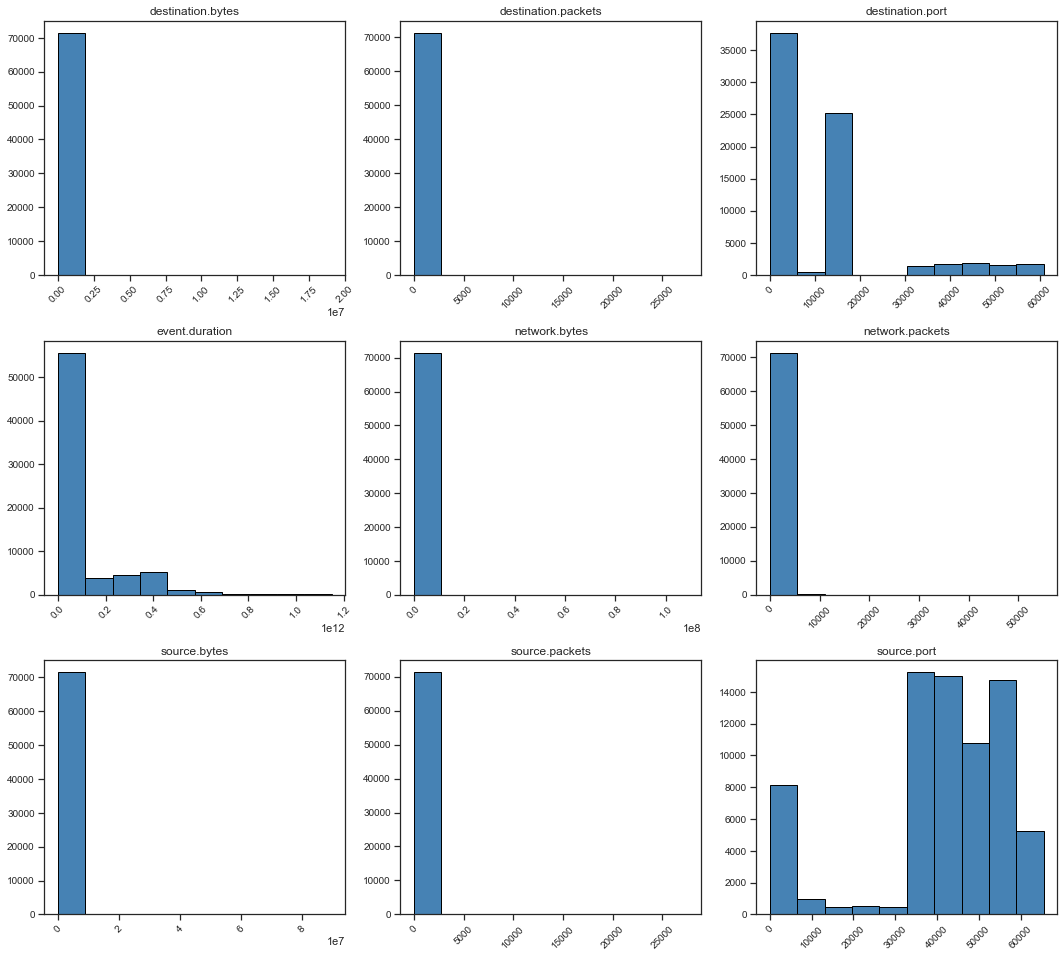

In [110]:
import matplotlib.pyplot as plt

fig = data.hist(bins=10,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))